# Diabetes Analysis and Classification

This Jupyter Notebook analyzes the Pima Indians Diabetes Dataset to predict diabetes using machine learning. The code includes data loading, preprocessing, exploratory data analysis (EDA), handling class imbalance, model training, evaluation, and visualization generation.

In [1]:
# Install ipykernel to register the virtual environment kernel
!pip install ipykernel

# Register the virtual environment as a Jupyter kernel
!python -m ipykernel install --user --name venv --display-name "Python (venv)"

# Print instructions
print("Please select the 'Python (venv)' kernel in VS Code:")
print("1. Click the kernel name (top-right) or 'Select Kernel' in the notebook.")
print("2. Choose 'Python (venv)' from the list.")

Defaulting to user installation because normal site-packages is not writeable
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec venv in /Users/dereddylikhith/Library/Jupyter/kernels/venv
Please select the 'Python (venv)' kernel in VS Code:
1. Click the kernel name (top-right) or 'Select Kernel' in the notebook.
2. Choose 'Python (venv)' from the list.


In [1]:
# Install imbalanced-learn
!pip install imbalanced-learn

# Verify installation
try:
    import imblearn
    print("imbalanced-learn version:", imblearn.__version__)
except Exception as e:
    print("imbalanced-learn installation failed:", e)

Defaulting to user installation because normal site-packages is not writeable
imbalanced-learn version: 0.12.4


In [2]:
# Check Python environment
import platform
import sys
print("Python version:", sys.version)
print("Python architecture:", platform.architecture())
print("Python executable:", sys.executable)

Python version: 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
Python architecture: ('64bit', '')
Python executable: /Library/Developer/CommandLineTools/usr/bin/python3


In [3]:
# Uninstall xgboost to avoid conflicts
!pip uninstall xgboost -y

# Install all required libraries in the virtual environment
!pip install xgboost==1.7.6 imbalanced-learn pandas numpy matplotlib seaborn scikit-learn

# Verify installations
try:
    import xgboost
    print("XGBoost version:", xgboost.__version__)
except Exception as e:
    print("XGBoost installation failed:", e)

try:
    import imblearn
    print("imbalanced-learn version:", imblearn.__version__)
except Exception as e:
    print("imbalanced-learn installation failed:", e)

Found existing installation: xgboost 1.6.2
Uninstalling xgboost-1.6.2:
  Successfully uninstalled xgboost-1.6.2
Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-1.7.6-py3-none-macosx_12_0_arm64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-macosx_12_0_arm64.whl (1.6 MB)
XGBoost version: 1.7.6
imbalanced-learn version: 0.12.4


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Set plot style for better visuals
plt.style.use('default')
%matplotlib inline

Importing file As per file path. Also verify data set. 

CHANGE FILE PATH ACCRODINGLY FOR RESULTS.

In [4]:
# Define the file path
file_path = "/Users/dereddylikhith/Desktop/AI 602/DATASET/diabetes.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first five rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Basic DATASET Enquiry.

In [6]:
# Check dataset info
data.info()

# Check for null values
print("\nNull Values:")
print(data.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(data['Outcome'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Null Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age             

## Data Preprocessing

- **Handle Zero Values**: Replace zeros in Glucose, BloodPressure, SkinThickness, Insulin, and BMI with median values, as zeros are likely placeholders for missing data.
- **Outlier Detection and Clipping**: Use the Interquartile Range (IQR) method to detect and clip outliers.

In [7]:
# Replace zeros with median for specified columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    data[col] = data[col].replace(0, data[col].median())

# Verify no zeros remain
print("Zero Values After Replacement:")
print(data[cols_with_zeros].eq(0).sum())

Zero Values After Replacement:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


This cell implements outlier clipping for the Pima Indians Diabetes Dataset using the Interquartile Range (IQR) method, applied to all features except the Outcome column. It defines a function to clip outliers and verifies the process by counting remaining outliers, ensuring data quality for the diabetes prediction model. The output confirms no outliers remain after clipping.

Outliers were clipped using the IQR method, ensuring no extreme values remained in the dataset, as verified by a post-clipping check that reported zero outliers for all features.

In [8]:
# Function to detect and clip outliers using IQR
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply clipping to all features except Outcome
for col in data.columns[:-1]:  # Exclude Outcome
    data = clip_outliers(data, col)

# Check outliers after clipping
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

print("Outliers After Clipping:")
for col in data.columns[:-1]:
    print(f"{col}: {count_outliers(data, col)}")

Outliers After Clipping:
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


## Exploratory Data Analysis (EDA)

Generate visualizations to understand feature distributions, relationships, and correlations:
- Histograms for feature distributions.
- Box plots for outlier visualization (post-clipping).
- Pair plot for key features (Glucose, BMI, Age, Outcome).
- Correlation heatmap for feature relationships.

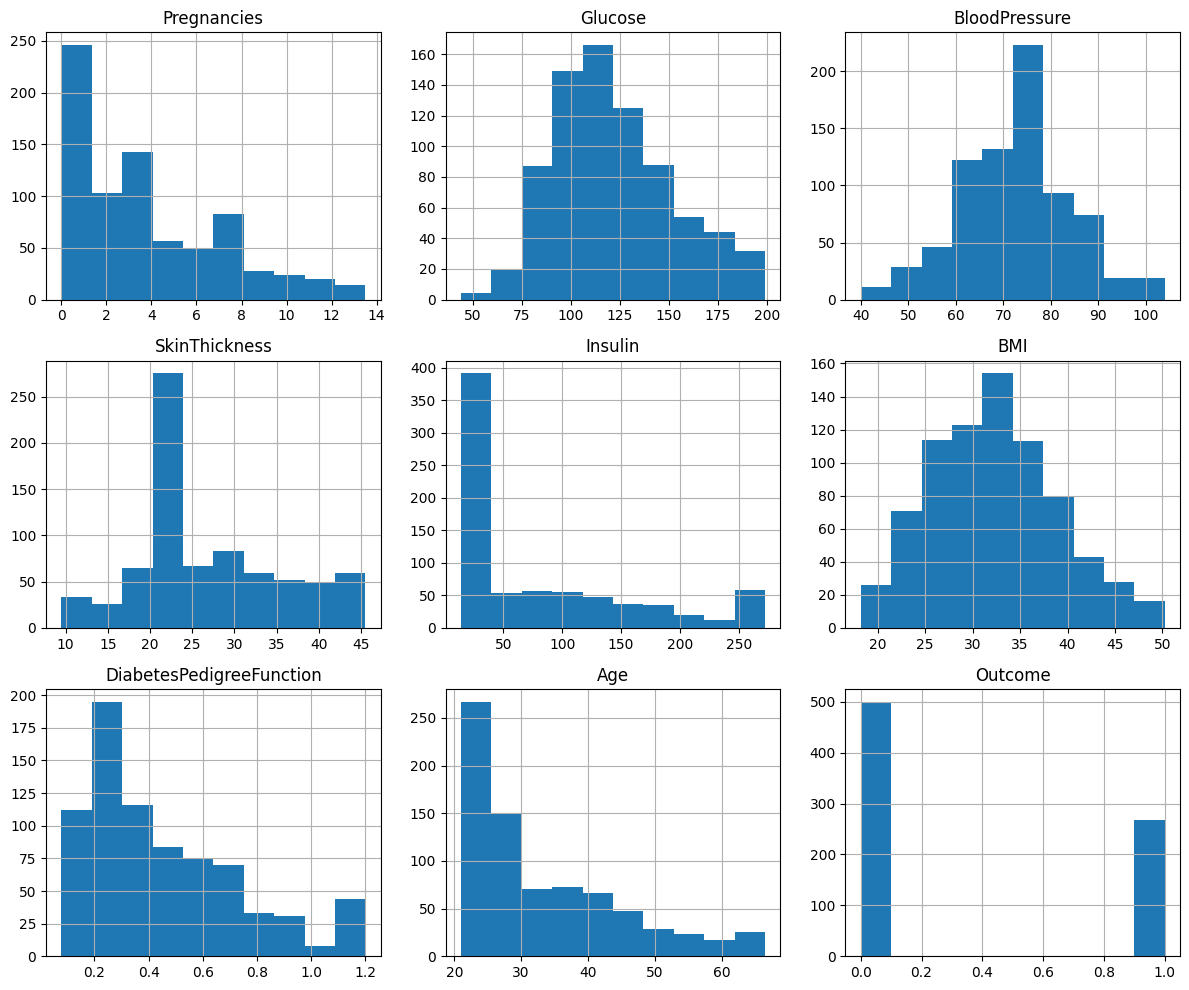

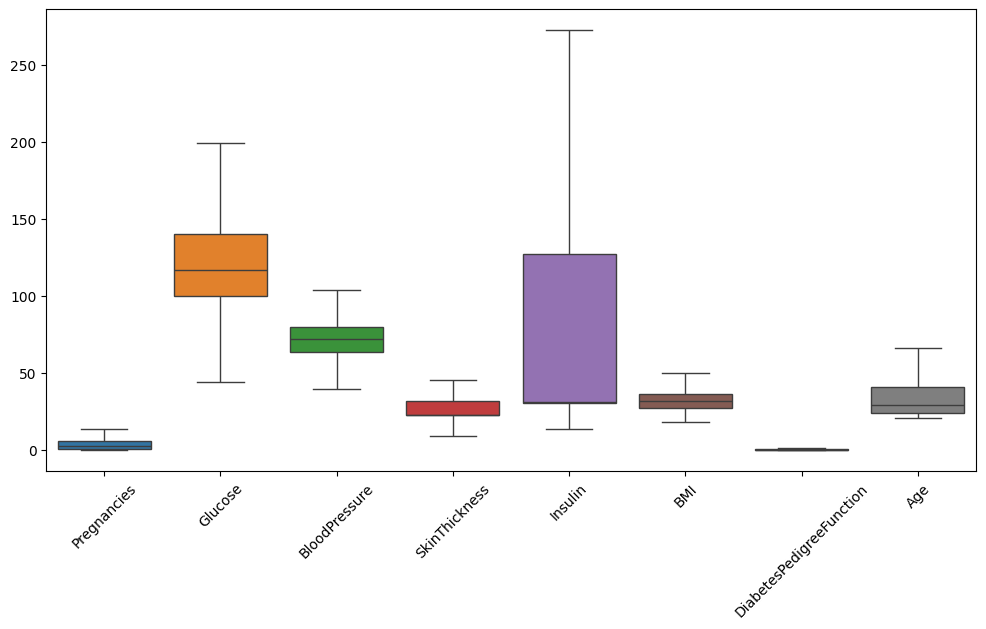

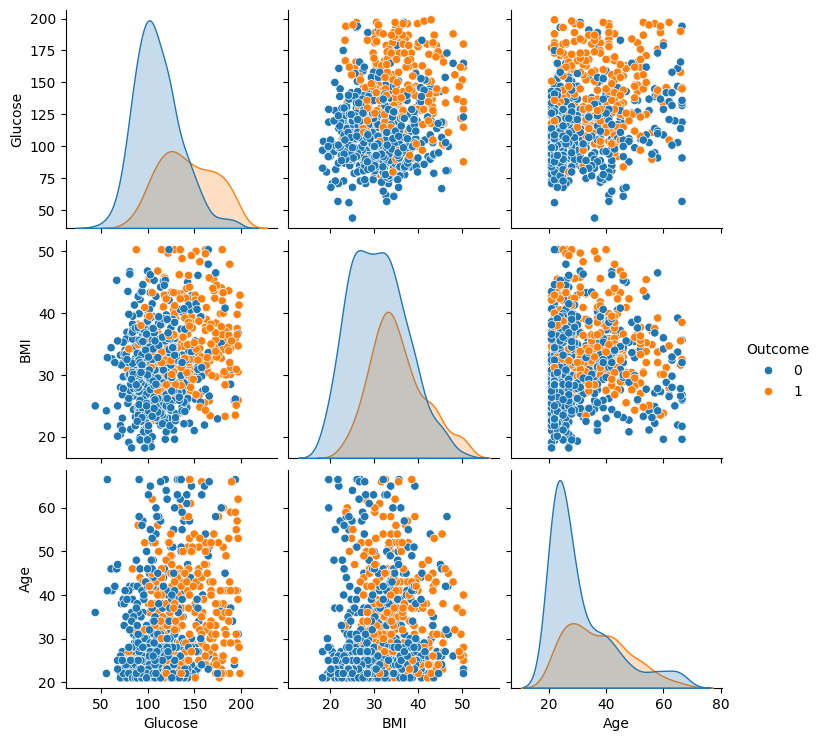

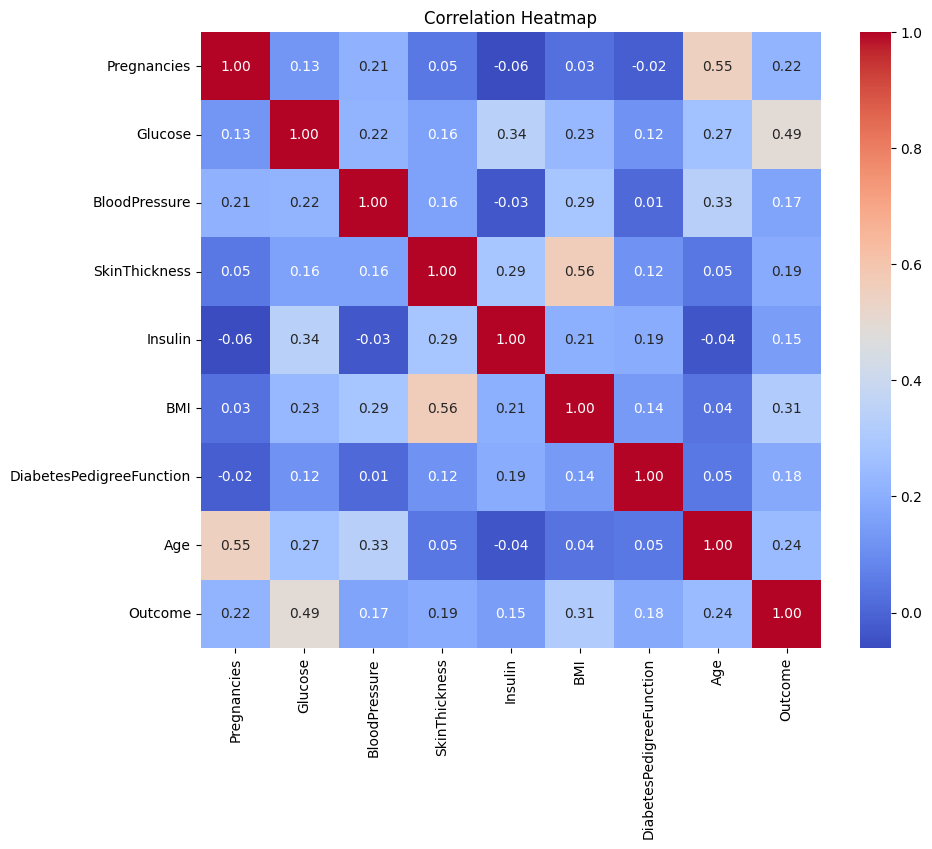

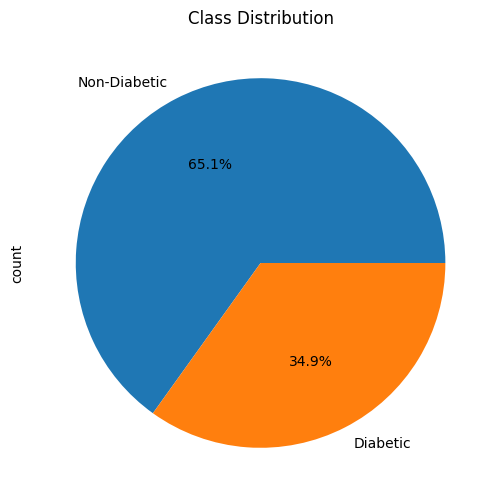

In [9]:
# Histograms for all features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig("histograms.png")
plt.show()

# Box plots for all features (except Outcome)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('Outcome', axis=1))
plt.xticks(rotation=45)
plt.savefig("boxplots.png")
plt.show()

# Pair plot for key features
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.savefig("pairplot.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig("correlation_heatmap.png")
plt.show()

# Class distribution pie chart
plt.figure(figsize=(6, 6))
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Diabetic', 'Diabetic'])
plt.title('Class Distribution')
plt.savefig("class_distribution.png")
plt.show()

## Data Splitting and Class Imbalance

- Split data into training (80%) and testing (20%) sets.
- Apply SMOTE to handle class imbalance (500 non-diabetic vs. 268 diabetic).
- Standardize features for model training.

In [10]:
# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Verify class balance
print("Class Distribution After SMOTE:")
print(y_smote.value_counts())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes to verify
print("\nShapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Class Distribution After SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64

Shapes:
X_train: (800, 8), y_train: (800,)
X_test: (200, 8), y_test: (200,)


## Model Training and Evaluation

Train and evaluate four models:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- XGBoost Classifier

Evaluate using accuracy, precision, recall, F1 score, ROC-AUC, and 5-fold cross-validation.


In [12]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),  # Increased max_iter
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Evaluate models
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_smote, y_smote, cv=5, scoring='accuracy')
    metrics['CV Accuracy (Mean)'] = cv_scores.mean()
    metrics['CV Accuracy (Std)'] = cv_scores.std()
    
    results.append(metrics)

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Save results to CSV
results_df.to_csv("model_results.csv", index=False)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  Logistic Regression     0.760   0.747664  0.792079  0.769231  0.831683   
1        Decision Tree     0.750   0.729730  0.801980  0.764151  0.749475   
2        Random Forest     0.800   0.765217  0.871287  0.814815  0.882138   
3              XGBoost     0.795   0.763158  0.861386  0.809302  0.857686   

   CV Accuracy (Mean)  CV Accuracy (Std)  
0               0.748           0.026382  
1               0.749           0.075921  
2               0.833           0.070043  
3               0.805           0.059076  


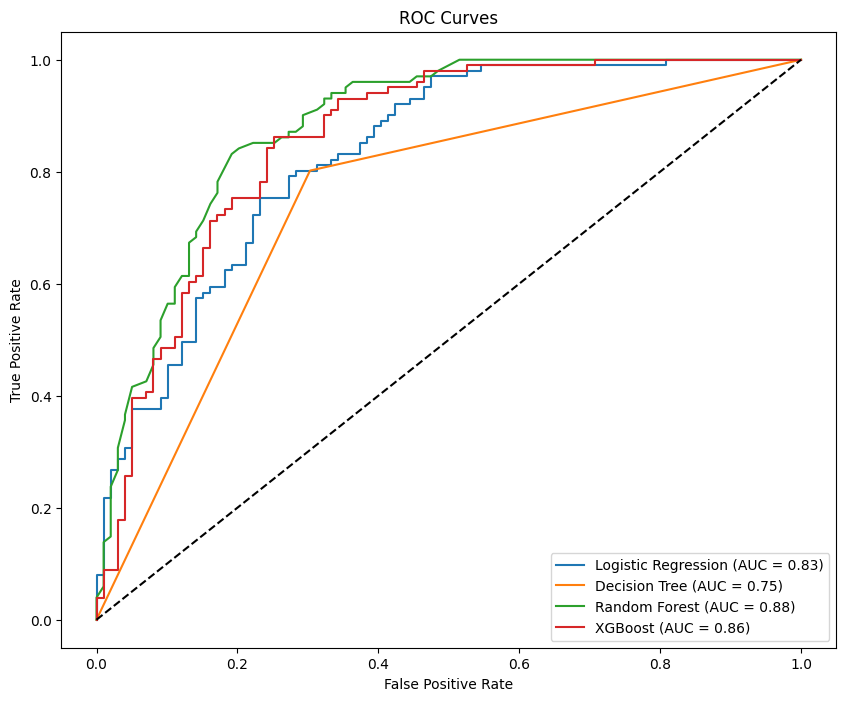

In [13]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.savefig("roc_curves.png")
plt.show()

## Feature Importance

Visualize feature importance from the Random Forest model to identify key predictors.


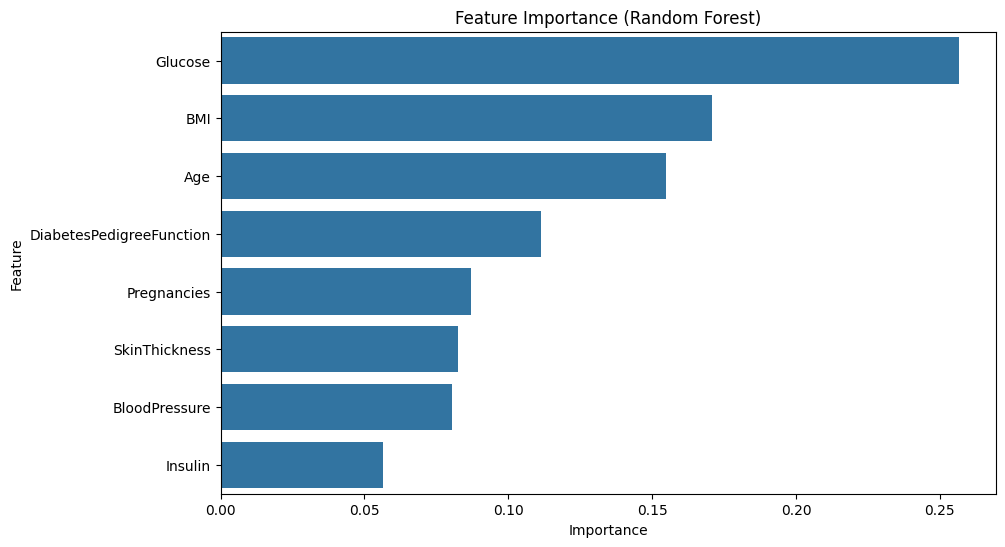

In [14]:
# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.savefig("feature_importance.png")
plt.show()

/var/folders/zc/x487gp5s6fl782qjkz3smtsc0000gn/T/ipykernel_96113/3593084976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


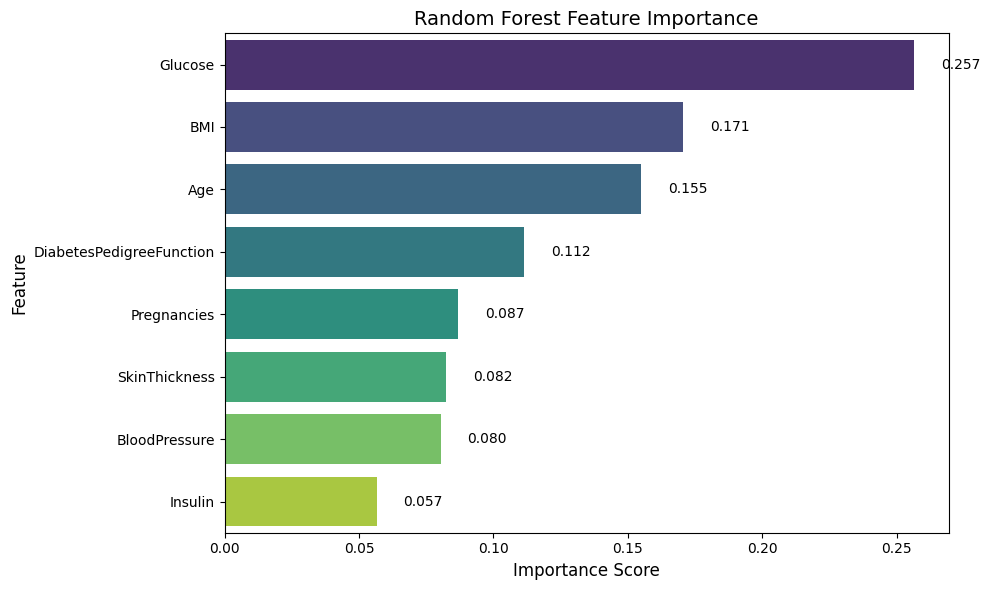

In [17]:
# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance with numerical scores on bars
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

# Add numerical scores on the bars
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{feature_importance["Importance"].iloc[i]:.3f}', 
             ha='left', va='center', fontsize=10)

plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig("random_forest_feature_importance.png")
plt.show()

/var/folders/zc/x487gp5s6fl782qjkz3smtsc0000gn/T/ipykernel_96113/999589555.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Importance', y='Feature', data=xgb_importance, palette='magma')


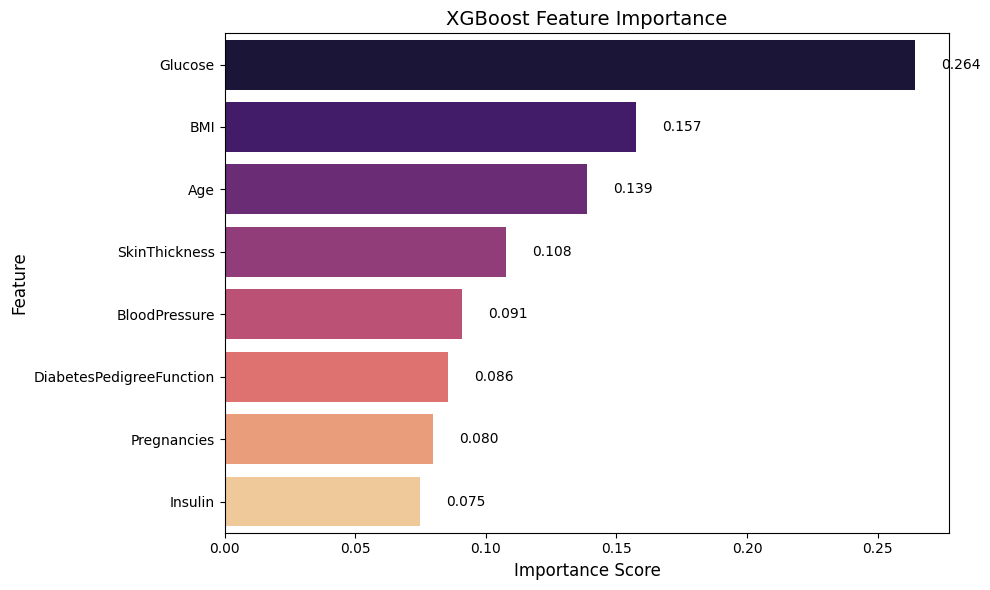

In [19]:
# Get feature importance from XGBoost
xgb_model = models['XGBoost']
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance with numerical scores on bars
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Importance', y='Feature', data=xgb_importance, palette='magma')

# Add numerical scores on the bars
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{xgb_importance["Importance"].iloc[i]:.3f}', 
             ha='left', va='center', fontsize=10)

plt.title('XGBoost Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig("xgboost_feature_importance.png")
plt.show()

COMPARISION DIFFERENT METRICS

<Figure size 1200x800 with 0 Axes>

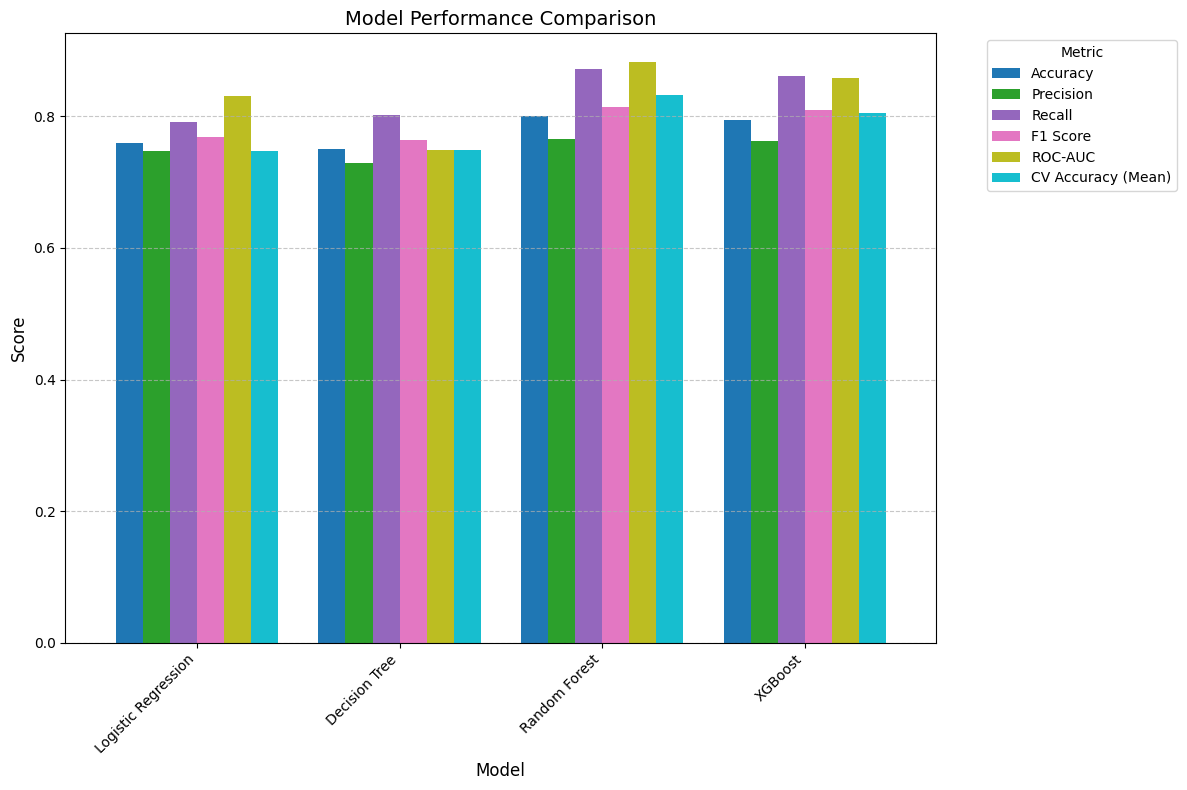

In [20]:
# Prepare the metrics dataframe for plotting
metrics_df = results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'CV Accuracy (Mean)']]

# Plot a bar chart comparing all metrics across models
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', figsize=(12, 8), colormap='tab10', width=0.8)

# Customize the plot
plt.title('Model Performance Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_performance_comparison.png")
plt.show()

Length of combined_importance: 16
                     Feature  Importance          Model
0                Pregnancies    0.087011  Random Forest
1                    Glucose    0.256525  Random Forest
2              BloodPressure    0.080344  Random Forest
3              SkinThickness    0.082421  Random Forest
4                    Insulin    0.056521  Random Forest
5                        BMI    0.170657  Random Forest
6   DiabetesPedigreeFunction    0.111532  Random Forest
7                        Age    0.154989  Random Forest
8                Pregnancies    0.079863        XGBoost
9                    Glucose    0.264265        XGBoost
10             BloodPressure    0.091084        XGBoost
11             SkinThickness    0.107880        XGBoost
12                   Insulin    0.074995        XGBoost
13                       BMI    0.157402        XGBoost
14  DiabetesPedigreeFunction    0.085707        XGBoost
15                       Age    0.138804        XGBoost
Number of bars

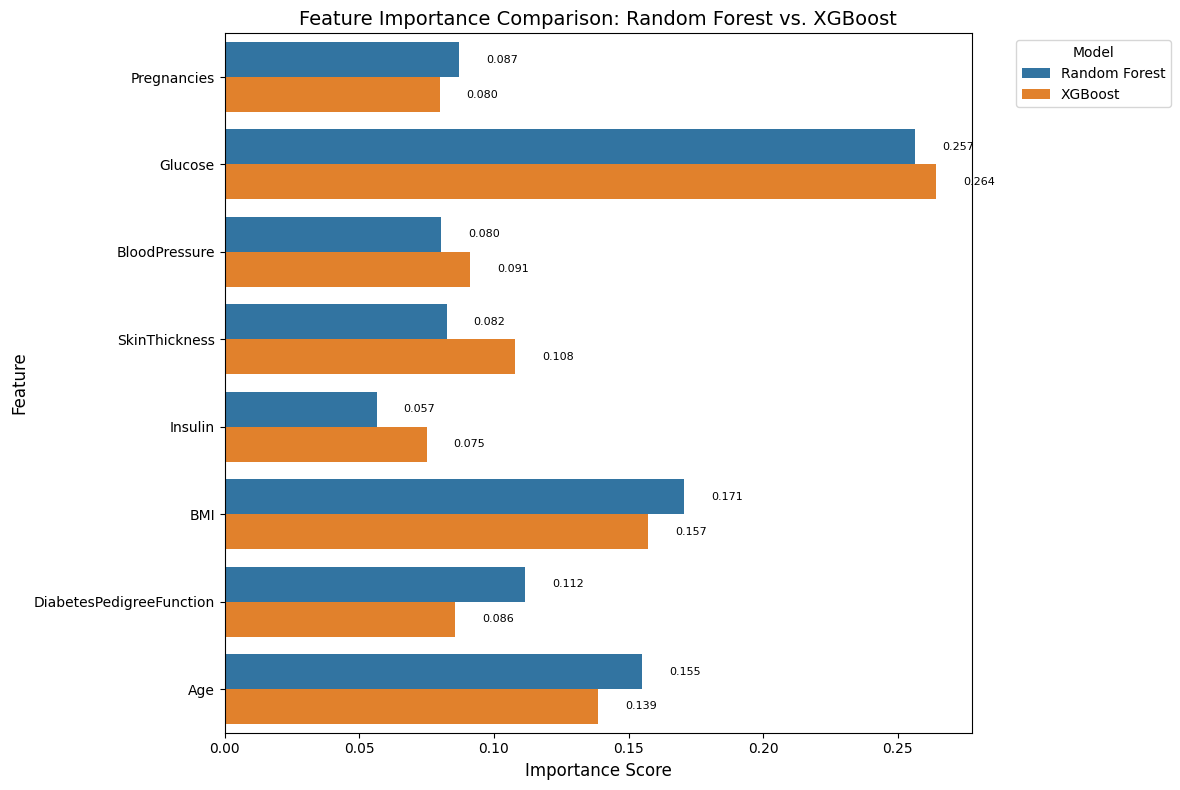

In [22]:
# Prepare feature importance data for both models
rf_model = models['Random Forest']
xgb_model = models['XGBoost']

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_,
    'Model': 'Random Forest'
})

xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_,
    'Model': 'XGBoost'
})

# Combine the dataframes and reset index
combined_importance = pd.concat([rf_importance, xgb_importance]).reset_index(drop=True)

# Debugging: Check lengths
print("Length of combined_importance:", len(combined_importance))
print(combined_importance)

# Plot feature importance comparison
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='Importance', y='Feature', hue='Model', data=combined_importance)

# Debugging: Check number of bars
print("Number of bars:", len(bars.patches))

# Add numerical scores on the bars
for i, bar in enumerate(bars.patches):
    if i < len(combined_importance):  # Ensure index is within bounds
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                 f'{combined_importance["Importance"].iloc[i]:.3f}', 
                 ha='left', va='center', fontsize=8)

plt.title('Feature Importance Comparison: Random Forest vs. XGBoost', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig("feature_importance_comparison.png")
plt.show()

Random Forest Prediction Model
Purpose: Uses the trained Random Forest model to predict diabetes for a new patient, preprocesses the input data consistently with the training pipeline, and interprets the prediction for the PPT.

DATA INPUT REFERENCE

Pregnancies: Integer, typically 0–17.

Glucose: Integer, typically 0–199 (mg/dL); zeros replaced with median.

BloodPressure: Integer, typically 0–122 (mmHg); zeros replaced with median.

SkinThickness: Integer, typically 0–99 (mm); zeros replaced with median.

Insulin: Integer, typically 0–846 (mu U/ml); zeros replaced with median.

BMI: Float, typically 0–67.1 (kg/m²); zeros replaced with median.

DiabetesPedigreeFunction: Float, typically 0.078–2.42 (genetic risk score).

Age: Integer, typically 21–81 (years).

New Patient Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      120             70             20       80  32.0   

   DiabetesPedigreeFunction  Age  
0                       0.5   35  



Feature Contributions to Prediction (Ranked by Importance):
                    Feature  Importance
1                   Glucose    0.256525
5                       BMI    0.170657
7                       Age    0.154989
6  DiabetesPedigreeFunction    0.111532
0               Pregnancies    0.087011
3             SkinThickness    0.082421
2             BloodPressure    0.080344
4                   Insulin    0.056521


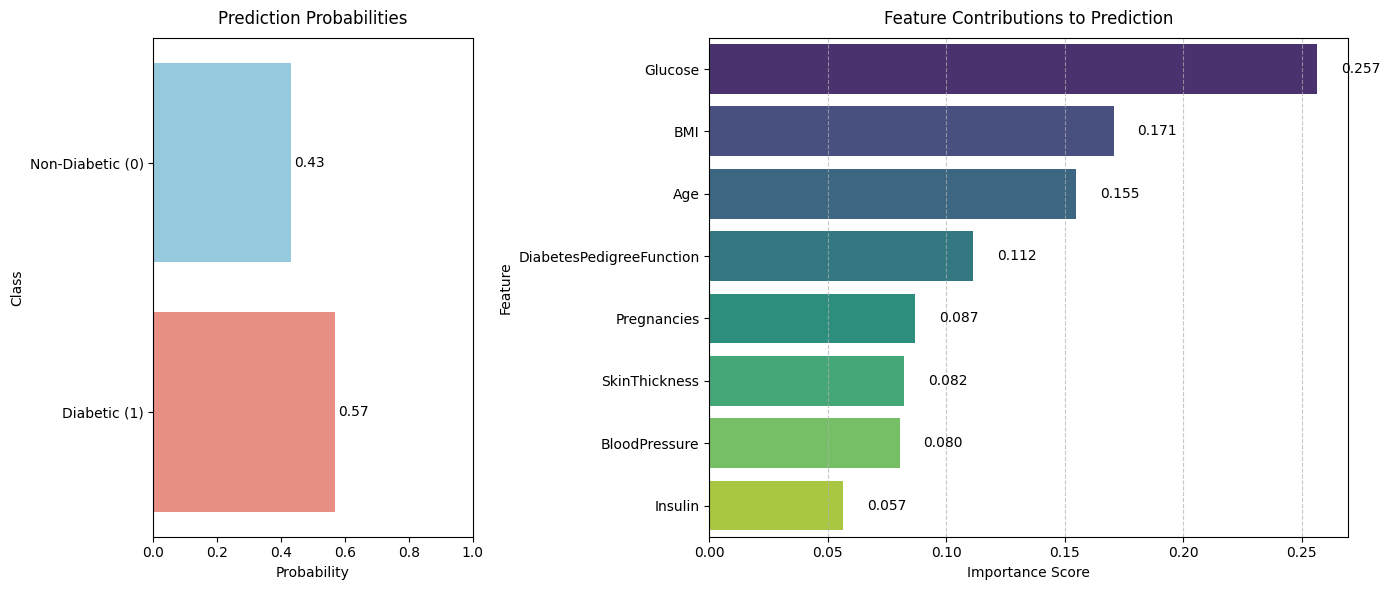

In [ ]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the same preprocessing as training data
# 1. Define the preprocessing functions 
def replace_zeros(df, cols_with_zeros):
    for col in cols_with_zeros:
        df[col] = df[col].replace(0, df[col].median())
    return df

def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# 2. Create a sample new patient record
new_patient = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [20],
    'Insulin': [80],
    'BMI': [32.0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [35]
})

# 3. Apply preprocessing to the new patient data
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
new_patient = replace_zeros(new_patient, cols_with_zeros)
for col in new_patient.columns:
    new_patient = clip_outliers(new_patient, col)

# 4. Standardize the new patient data
new_patient_scaled = scaler.transform(new_patient)

# 5. Make prediction using the Random Forest model
rf_model = models['Random Forest']
prediction_prob = rf_model.predict_proba(new_patient_scaled)[0]  # Probability of [class 0, class 1]
prediction_class = rf_model.predict(new_patient_scaled)[0]       # Predicted class (0 or 1)

# 6. Display the new patient data
print("New Patient Data:")
print(new_patient)

# 7. Create a combined figure for probabilities and feature contributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]})

# Plot 1: Prediction probabilities as a bar plot
prob_df = pd.DataFrame({
    'Class': ['Non-Diabetic (0)', 'Diabetic (1)'],
    'Probability': [prediction_prob[0], prediction_prob[1]]
})
sns.barplot(x='Probability', y='Class', hue='Class', data=prob_df, ax=ax1, palette=['skyblue', 'salmon'], legend=False)
for i, bar in enumerate(ax1.patches):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{prob_df["Probability"].iloc[i]:.2f}', 
             ha='left', va='center', fontsize=10, color='black')
ax1.set_title('Prediction Probabilities', fontsize=12, pad=10)
ax1.set_xlabel('Probability', fontsize=10)
ax1.set_ylabel('Class', fontsize=10)
ax1.set_xlim(0, 1)

# 8. Styled prediction output
prediction_text = "Diabetic" if prediction_class == 1 else "Non-Diabetic"
color = "red" if prediction_class == 1 else "green"
display(HTML(f'<h3 style="color:{color};">Prediction: {prediction_text} (Class: {prediction_class})</h3>'))

# 9. Feature contributions (using feature importances)
feature_contributions = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Contributions to Prediction (Ranked by Importance):")
print(feature_contributions)

# Plot 2: Feature contributions with enhanced styling
bars = sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_contributions, ax=ax2, palette='viridis', legend=False)
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{feature_contributions["Importance"].iloc[i]:.3f}', 
             ha='left', va='center', fontsize=10, color='black')
ax2.set_title('Feature Contributions to Prediction', fontsize=12, pad=10)
ax2.set_xlabel('Importance Score', fontsize=10)
ax2.set_ylabel('Feature', fontsize=10)
ax2.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout and save the combined figure
plt.tight_layout()
plt.savefig("random_forest_prediction_combined.png")
plt.show()

DECISION TREE 

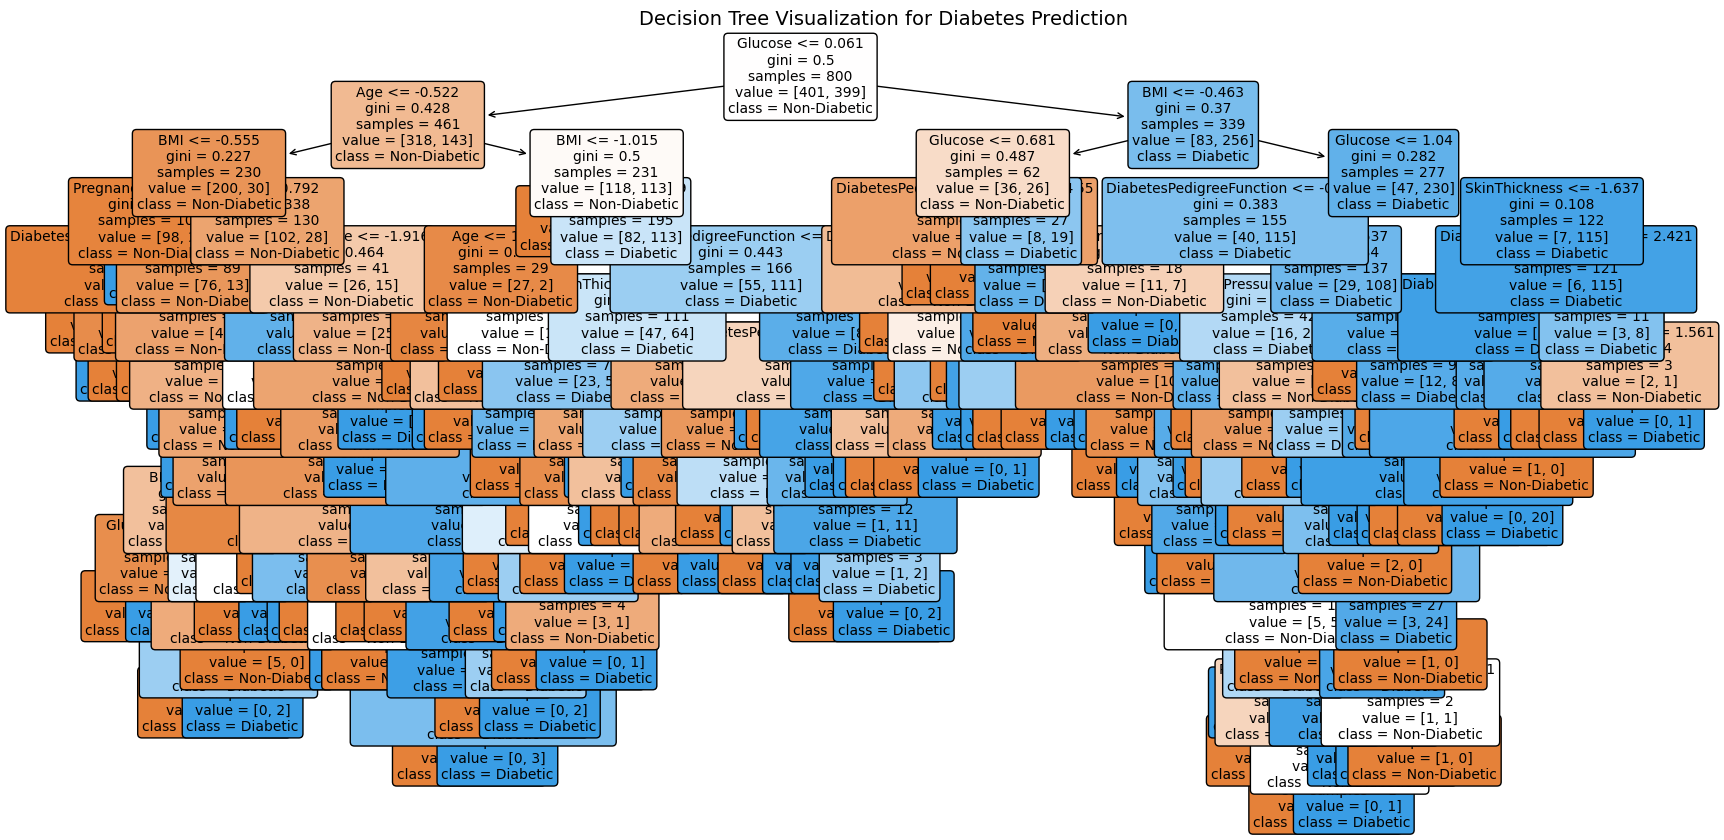

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access the trained Decision Tree model
dt_model = models['Decision Tree']

# Create a figure for the Decision Tree visualization
plt.figure(figsize=(20, 10), dpi=100)  # Adjust size and resolution for clarity

# Plot the Decision Tree
plot_tree(
    dt_model,
    feature_names=X.columns,  # Feature names from your dataset
    class_names=['Non-Diabetic', 'Diabetic'],  # Class names for Outcome (0 and 1)
    filled=True,  # Color-code nodes based on class
    rounded=True,  # Round the node edges for better aesthetics
    fontsize=10  # Adjust font size for readability
)

# Add a title
plt.title('Decision Tree Visualization for Diabetes Prediction', fontsize=14, pad=20)

# Save the plot as a PNG file for the PPT
plt.savefig("decision_tree_visualization.png", bbox_inches='tight')

# Display the plot
plt.show()

FINAL DECISION TREE MODEL

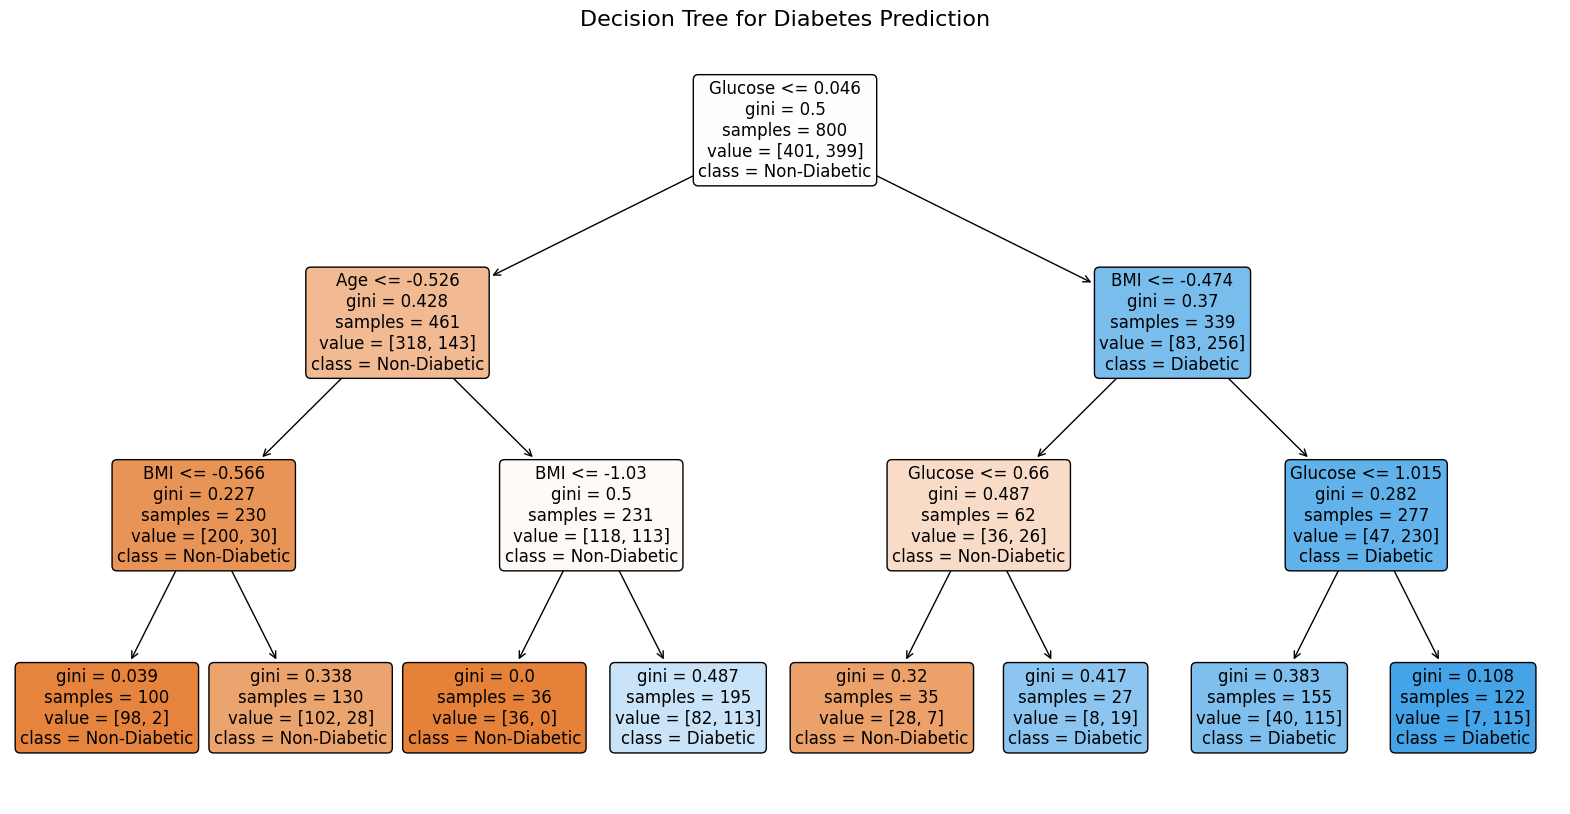

Decision tree visualization saved as 'decision_tree.png'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

# Preprocessing functions
def replace_zeros(df, cols_with_zeros):
    """Replace zero values with column medians."""
    for col in cols_with_zeros:
        df[col] = df[col].replace(0, df[col].median())
    return df

def clip_outliers(df, column):
    """Clip outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Load dataset
data = pd.read_csv(file_path)  # Replace with actual path to dataset

# Define columns with potential zero values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Preprocess data
data = replace_zeros(data, cols_with_zeros)
for col in data.columns[:-1]:  # Exclude Outcome column
    data = clip_outliers(data, col)

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Train Decision Tree model with limited depth for visualization
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Non-Diabetic', 'Diabetic'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title('Decision Tree for Diabetes Prediction', fontsize=16)
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# Print confirmation
print("Decision tree visualization saved as 'decision_tree.png'")